In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#讀入檔案
memberData = pd.read_csv('Member.csv', dtype = {'IsInBlackList' : object})
memberData.head()

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
0,1587633,NaN,NaN,Web,2016-08-05 19:45:59.670,NaN,0,0,NaN
1,1587634,NaN,NaN,Web,2016-10-27 21:25:22.907,NaN,0,0,NaN
2,1587658,NaN,NaN,Web,2015-08-11 19:11:09.030,NaN,0,0,NaN
3,1587809,NaN,NaN,Web,2015-08-11 19:53:32.397,NaN,0,0,NaN
4,1587830,NaN,NaN,Web,2017-06-03 17:33:03.987,NaN,0,0,NaN


In [73]:
#刪除 NAN資料
#memberData = memberData.dropna()
#選取性別與註冊方式的欄位
gender = memberData['GenderTypeDef']
print(gender.head())
regi = memberData['RegisterSourceTypeDef']
print(regi.head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: GenderTypeDef, dtype: object
0    Web
1    Web
2    Web
3    Web
4    Web
Name: RegisterSourceTypeDef, dtype: object


# 觀察男女性使用不同管道註冊管道的差異

11466


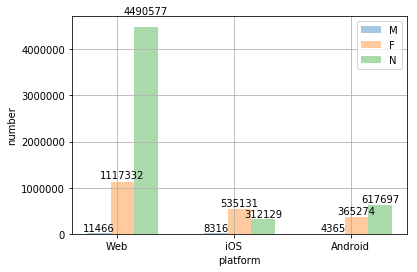

In [96]:
#篩選資料
isNaN = (memberData['GenderTypeDef'].isnull()) #沒有填性別
isMale = (memberData['GenderTypeDef'] == 'Male') #男性
isFemale = (memberData['GenderTypeDef'] == 'Female') #女性
isWeb = (memberData['RegisterSourceTypeDef'] == 'Web') #使用 Web
isIOS = (memberData['RegisterSourceTypeDef'] == 'iOSApp') #使用IOS
isAndroid = (memberData['RegisterSourceTypeDef'] == 'AndroidApp') #使用安卓
menWeb = memberData[(isMale & isWeb)]
menIOS = memberData[(isMale & isIOS)]
menAnd = memberData[(isMale & isAndroid)]
womenWeb = memberData[(isFemale & isWeb)]
womenIOS = memberData[(isFemale & isIOS)]
womenAnd = memberData[(isFemale & isAndroid)]
nanWeb = memberData[(isNaN & isWeb)]
nanIOS = memberData[(isNaN & isIOS)]
nanAnd = memberData[(isNaN & isAndroid)
                    
Men = (menWeb.size, menIOS.size, menAnd.size)
Women = (womenWeb.size, womenIOS.size, womenAnd.size)
NaN = (nanWeb.size, nanIOS.size, nanAnd.size)
                    
#製作長條圖
col_count = 3
bar_width = 0.2
index = np.arange(col_count)

menBar = plt.bar(index,
           Men, 
           bar_width,
           alpha=.4,
           label="M") 
womenBar = plt.bar(index+0.2,
            Women,
            bar_width,
            alpha=.4,
            label="F")
NanBar = plt.bar(index+0.4,
            NaN,
            bar_width,
            alpha=.4,
            label="N")

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.05, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(menBar)
createLabels(womenBar)
createLabels(NanBar)

plt.ylabel("number")
plt.xlabel("platform")
plt.title("")
plt.xticks(index+.3 / 2 ,("Web","iOS","Android"))
plt.legend() 
plt.grid(True)
plt.show()

經由上述長條圖發現大部分人其實沒有把基本資料填完 <br />
延伸出新的問題 <br />
如果電商能掌握客戶的一些特徵 <br />
便可以針對每個用戶去設計不同的促銷方案 <br />
男性和女性用戶在購物習慣上應有很大的不同 <br />
91App也許該在讓用戶完成習慣或基本資料調查上下一點功夫<br />